In [41]:
from matplotlib import pyplot as plt
from math import floor, exp
import math

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

In [42]:
# Sigmoid function 
sharpness = 500
def sig(x):
    if x >= 0:
        return 1/(1 + math.exp(-sharpness*x))
    else:
        return 1 - 1/(1 + math.exp(sharpness*x)) 

In [43]:
# will return bandwidth in Bytes/sec.
def convBandwidth(input):
    if input[-4:] == "Mbps" : return ((10**6) * float(input[:-4]))/8
    elif input[-4:] == "MBps" : return (10**6) * float(input[:-4])
    elif input[-3:] == "Bps" : return float(input[:-3])
    elif input[-3:] == "bps"    : return float(input[:-3])/8
    else:
        print("conversion not supported")
        return -1

# will return time in sec.
def convTime(input):
    if input[-2:] == "ms" : return (10**(-3) * float(input[:-2]))
    elif input[-1:] == "s" : return float(input[:-1])
    elif input[-3:] == "sec" : return float(input[:-3])
    else:
        print("conversion not supported")
        return -1

# values_dict is a time series data dictionary
def plotvstime(values_dict, xlabel, ylabel, title):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    plt.plot(values_dict.keys(), values_dict.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotlist(list_values, xlabel, ylabel, title):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    plt.plot(list_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    for i in range(n_flows):
        plt.plot(values_dict_n[i].keys(), values_dict_n[i].values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n_avg(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    avg_values = {}
    for t in values_dict_n[0].keys():
        
        temp_sum = 0
        for i in range(n_flows):
            temp_sum = temp_sum + values_dict_n[i][t]
            
        avg_values[t] = temp_sum/n_flows
        #print(avg_values)
   
    plt.plot(avg_values.keys(), avg_values.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    
def plotvstime_avg_each_flow(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    value_each_flow = {}
    
    for i in range(n_flows):
        value_each_flow[i+1]= sum(values_dict_n[i].values())/len(values_dict_n[i].keys())
    
    plt.bar(value_each_flow.keys(), value_each_flow.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)

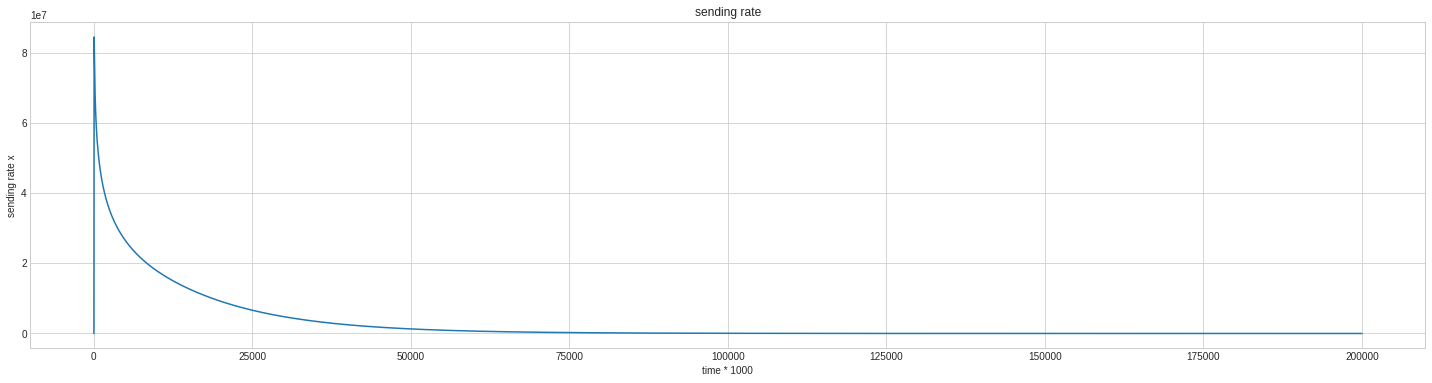

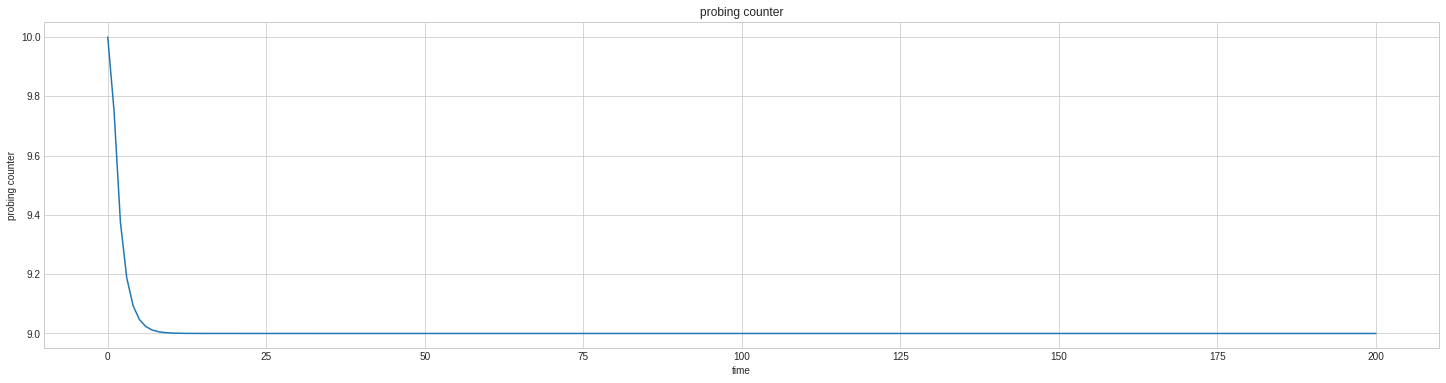

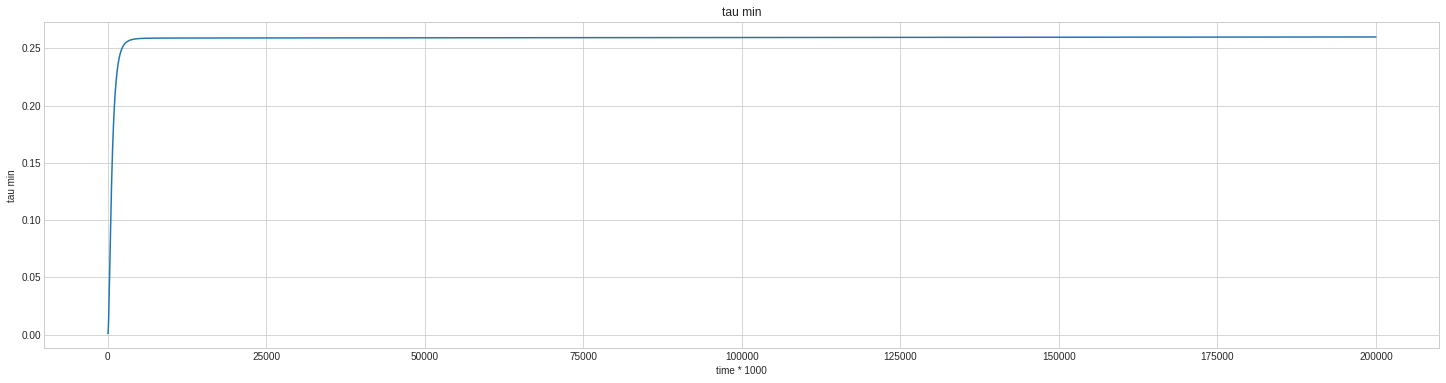

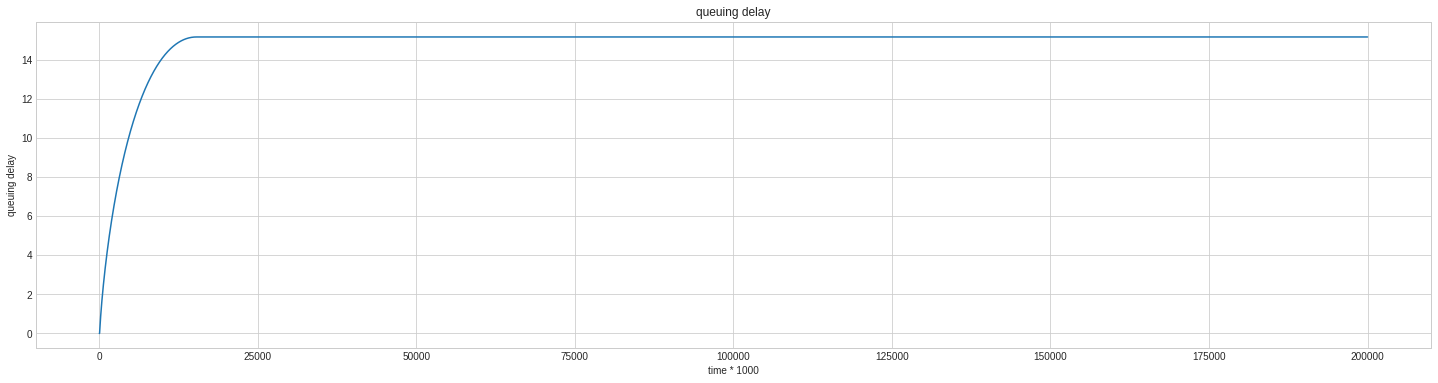

In [94]:
# CONFIG
start = 0
end = 200
# needs to be smaller than the smallest value of time ( T in sec. )
step = 0.001

x = [0.01]

t_prt = [convTime("10sec")]
C = convBandwidth("100Mbps")
T = convTime("1ms")
T_steps = int(convTime("1ms") / step)
q_delay = [0]
tau_min = [T]


def f1():
    return (1 - 0**(t_prt[-1]))

def f2(z):
    return ((z*exp(z))/(exp(z)+1))

def rate_q_next():
    return ((1/C)*(max(0, (x[-1]-C))))

def MIMD():
    return ((1-f1())*((1.25*T)/(T+q_delay[-1]))+(f1()*((2*T)/tau_min[-1])-1))

def x_next():
    return (MIMD()*(x[-1]/(T + q_delay[-1])))

def t_prt_next():
    return (t_prt[-1] - 1 + (10 - t_prt[-1] + 1)*(sig(tau_min[-1]-T-(q_delay[-T_steps] if len(q_delay) > T_steps else q_delay[-1] ))+1)/2)

def tau_min_next():
    return (-f2(tau_min[-1]-T-(q_delay[-T_steps] if len(q_delay) > T_steps else q_delay[-1] )))
    
t = 0
while t < end:
    
    x.append((x_next()*step) + x[-1])
    
    q_delay.append((rate_q_next()*step) + q_delay[-1])
    
    tau_min.append(tau_min_next()*step + tau_min[-1])
    
    if int(t) == int(t*(1/step))*step:
        t_prt.append(t_prt_next())
    
    t += step

plotlist(x, "time * " + str(int(1/step)), "sending rate x", "sending rate")

plotlist(t_prt, "time", "probing counter", "probing counter")

plotlist(tau_min, "time * " + str(int(1/step)), "tau min", "tau min")

plotlist(q_delay, "time * " + str(int(1/step)), "queuing delay", "queuing delay")


  